### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

# Homework Response Q1

In [2]:
# define function to remove all non-letters and make all letters lowercase
import re

def process_word(item: str):
    pattern: str = re.compile(r'[^\w\s]')
    item = pattern.sub('', item)

    return item.lower()


### Part 1

In [3]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        words = line.split()
        for word in words:
            word = process_word(word)
            if word == "":
                continue
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break

('the', 9250)
('project', 90)
('gutenberg', 87)
('ebook', 13)
('of', 4527)
('life', 88)
('on', 947)
('mississippi', 159)
('this', 780)
('is', 1138)
('for', 1093)
('use', 47)
('anyone', 5)
('anywhere', 18)
('in', 2589)
('united', 37)
('states', 54)
('and', 5892)
('most', 124)
('other', 270)
('parts', 9)
('world', 67)
('at', 748)
('no', 419)
('cost', 25)
('with', 1080)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('you', 1024)
('may', 89)
('copy', 17)
('it', 2290)
('give', 80)
('away', 171)
('or', 581)
('reuse', 2)
('under', 119)
('terms', 26)
('license', 24)
('included', 3)
('online', 4)
('wwwgutenbergorg', 5)
('if', 379)
('are', 385)
('not', 721)
('located', 9)
('will', 300)
('have', 569)
('to', 3585)
('check', 4)
('laws', 17)
('country', 77)
('where', 173)
('before', 207)
('using', 11)
('title', 3)
('author', 3)
('mark', 22)
('twain', 23)
('release', 1)
('date', 18)
('july', 7)
('10', 10)
('2004', 1)
('245', 1)
('recently', 4)
('updated', 2)
('january', 3)
('1', 13)
('2021', 1

### Part 2

In [4]:
from operator import itemgetter

sorted_wdict = sorted(wdict.items(), key=itemgetter(1), reverse=True)

print(sorted_wdict[:100])

[('the', 9250), ('and', 5892), ('of', 4527), ('a', 4051), ('to', 3585), ('in', 2589), ('it', 2290), ('i', 2202), ('was', 2087), ('that', 1723), ('he', 1399), ('is', 1138), ('for', 1093), ('with', 1080), ('you', 1024), ('his', 959), ('had', 959), ('but', 951), ('on', 947), ('as', 878), ('this', 780), ('they', 754), ('at', 748), ('not', 721), ('all', 717), ('by', 712), ('one', 683), ('there', 626), ('were', 625), ('be', 617), ('or', 581), ('my', 581), ('from', 575), ('have', 569), ('out', 540), ('so', 536), ('up', 526), ('him', 519), ('we', 517), ('me', 516), ('when', 505), ('which', 476), ('would', 474), ('river', 457), ('an', 440), ('them', 424), ('no', 419), ('then', 405), ('said', 399), ('are', 385), ('if', 379), ('their', 377), ('now', 364), ('about', 346), ('time', 337), ('been', 335), ('down', 326), ('its', 323), ('could', 311), ('has', 305), ('will', 300), ('into', 300), ('what', 284), ('her', 277), ('other', 270), ('two', 270), ('some', 267), ('do', 267), ('new', 259), ('man', 2

In [5]:
total_count = sum(count for word, count in sorted_wdict)
print(f"Total words: {total_count}")
total_distinct_words = len(sorted_wdict)
print(f"Total distinct words: {total_distinct_words}")

top_90 = total_count * .9

Total words: 147421
Total distinct words: 14737


In [6]:
# getting the number of distinct words
distinct_words = 0
current_sum = 0

for word, count in sorted_wdict:
    if current_sum >= top_90:
 
        break
    else:
        current_sum = current_sum + count
        distinct_words += 1
    
print(f"Total Distinct Words that Comprise top 90%: {distinct_words}")

Total Distinct Words that Comprise top 90%: 3835


## Homework Response Q2

In [7]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary

# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)

# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)


The vocabulary size is:  30522
(30522, 1024)
4000
10000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.157s
[t-SNE] Iteration 50: error = 97.8566971, gradie

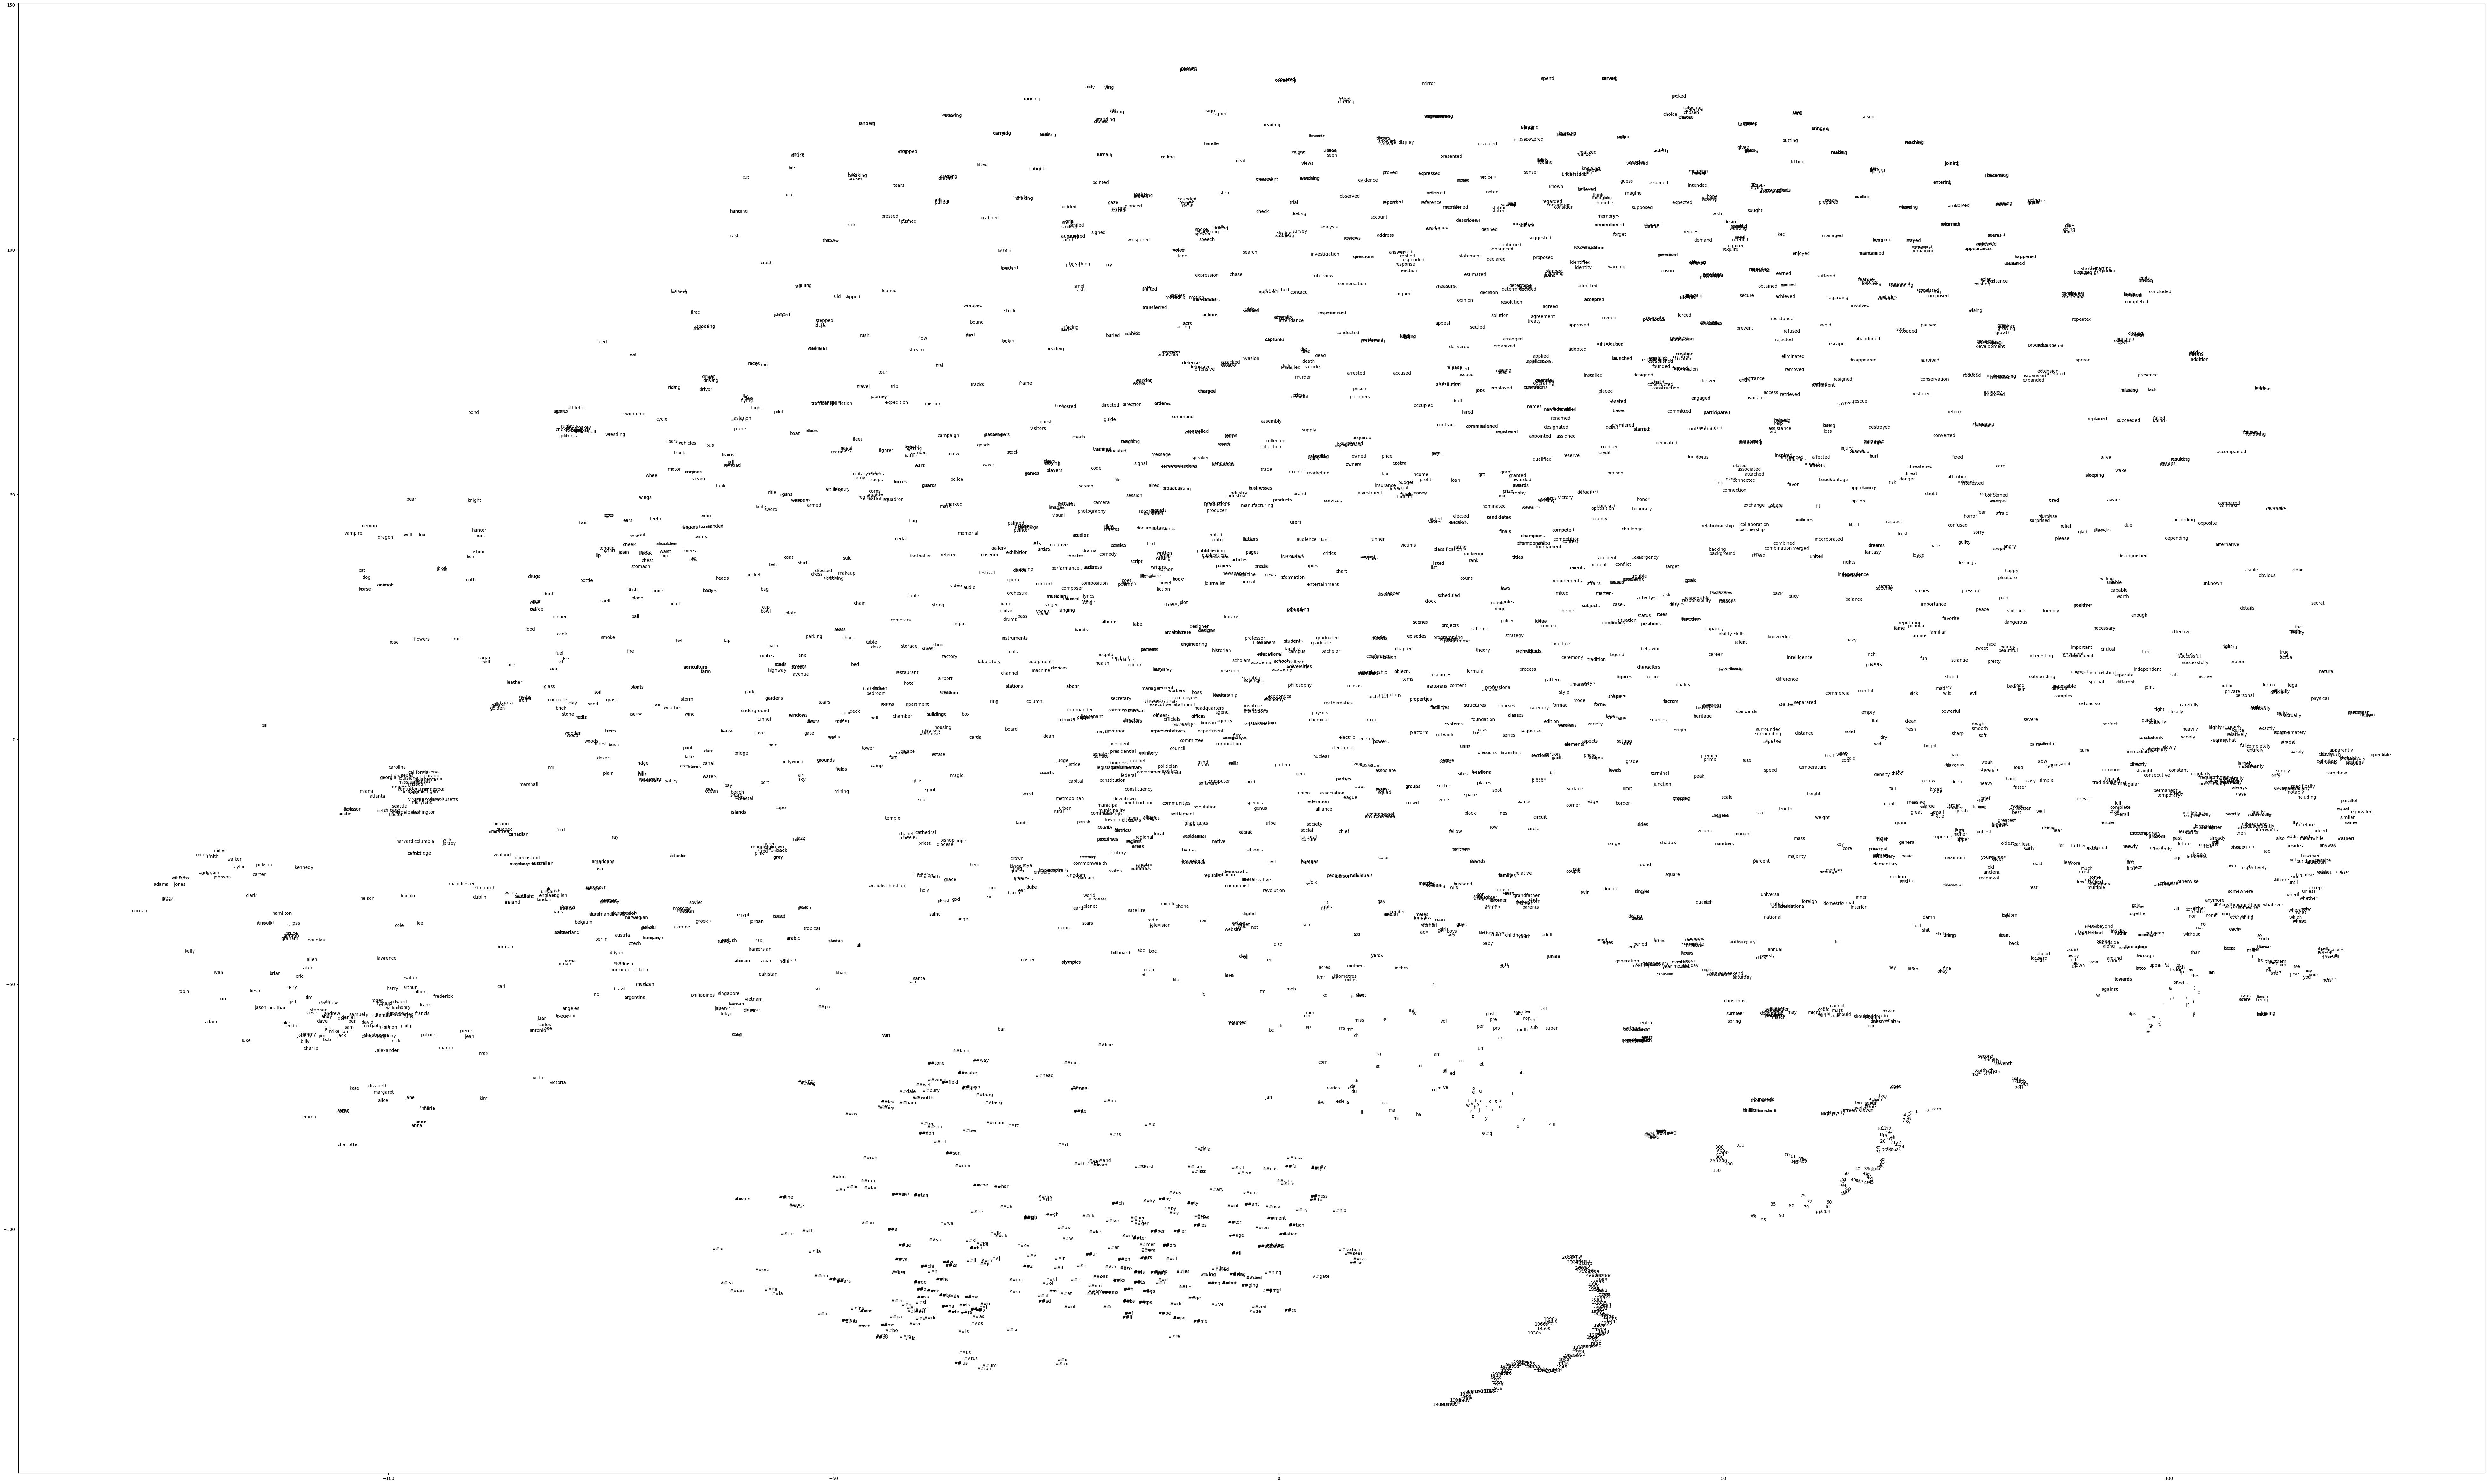

In [8]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)
    


plt.show()

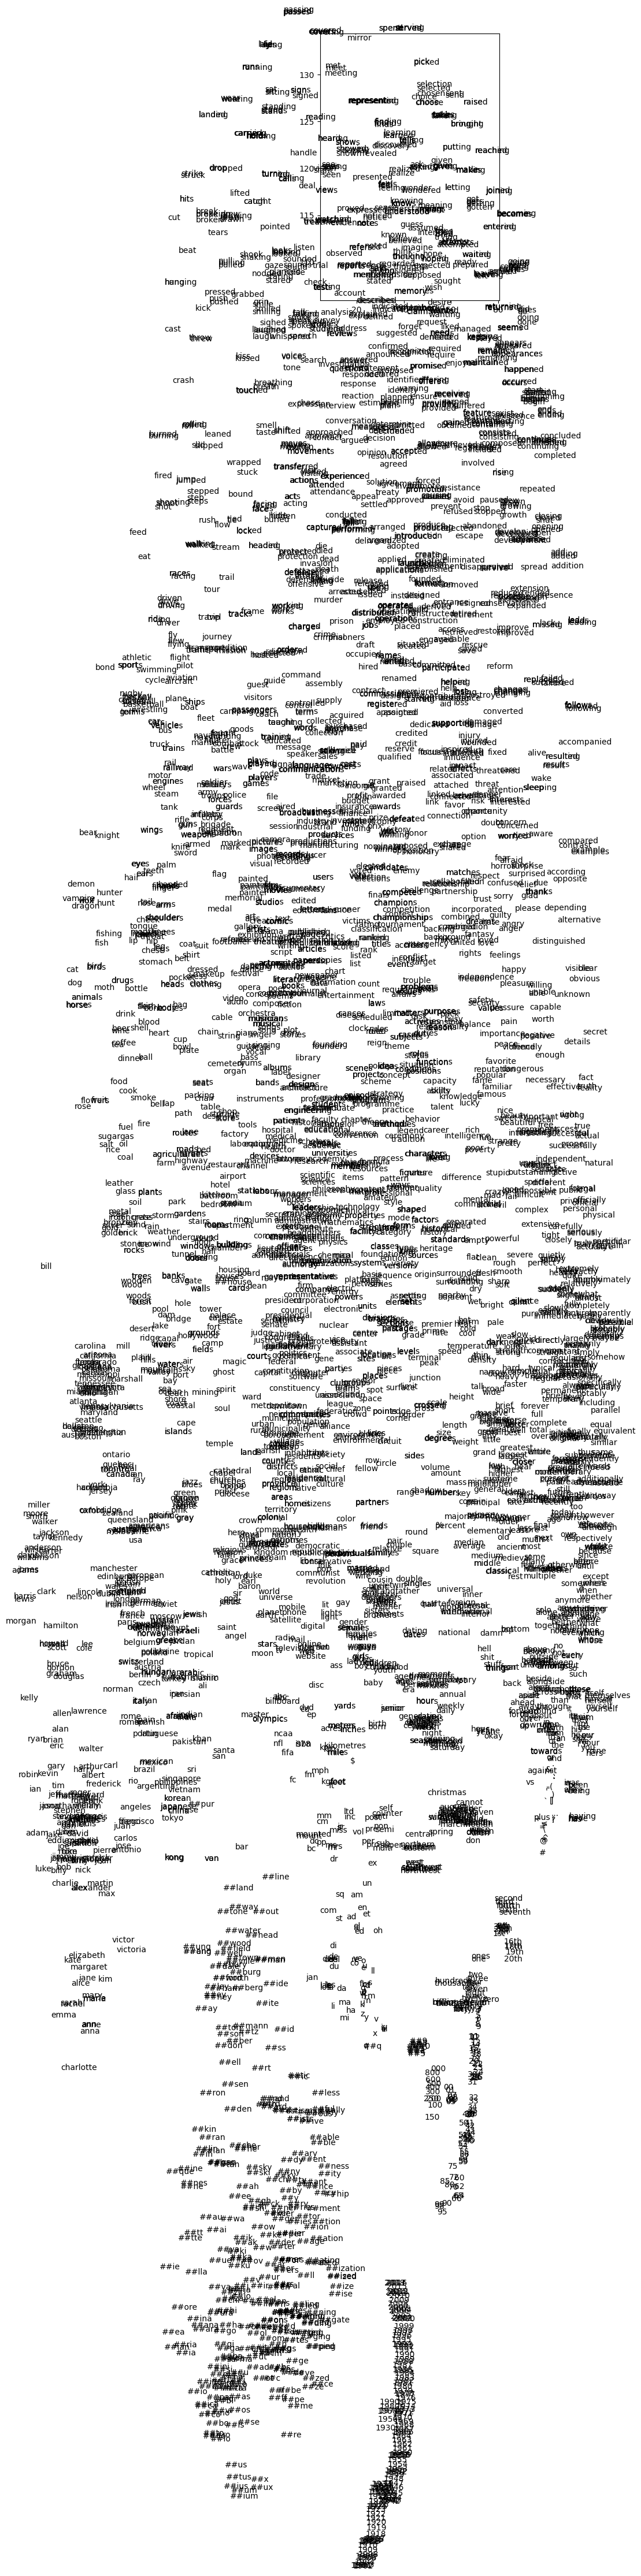

In [9]:


# Define the text label for which you want to specify the center
target_label = "ask"

# Find the index of the target label in bert_words_to_plot
target_index = np.where(np.array(bert_words_to_plot) == target_label)[0][0]

# Get the coordinates of the target label
x_center = bert_word_embs_to_use_tsne[target_index, 0]
y_center = bert_word_embs_to_use_tsne[target_index, 1]

# Define the width and height of the window (in fractions of the current range)
window_width_fraction = 0.3 
window_height_fraction = 0.1 

# Calculate the current range for x and y axes
x_range = max(bert_word_embs_to_use_tsne[:,0]) - min(bert_word_embs_to_use_tsne[:,0])
y_range = max(bert_word_embs_to_use_tsne[:,1]) - min(bert_word_embs_to_use_tsne[:,1])

# Calculate the dimensions of the window
window_width = x_range * window_width_fraction
window_height = y_range * window_height_fraction

# Calculate the new limits for the plot axes
x_min = x_center - window_width/2
x_max = x_center + window_width/2
y_min = y_center - window_height/2
y_max = y_center + window_height/2

# Plot the transformed BERT vocabulary embeddings
fig = plt.figure(figsize=(4, 6))
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)

# Set the limits for the plot

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

